In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
import tqdm
import time

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

np.random.seed(42)

In [109]:
# method to reshape so that we don't write that again and again
def reshape(x: pd.Series) -> np.ndarray:
    return x.values.reshape(-1,1)

In [110]:
train = [pd.read_csv(f'./2B-dataset/train_set_{x}.csv') for x in ['A', 'B', 'C']]
test = [pd.read_csv(f'./2B-dataset/test_set_{x}.csv') for x in ['A', 'B', 'C']]

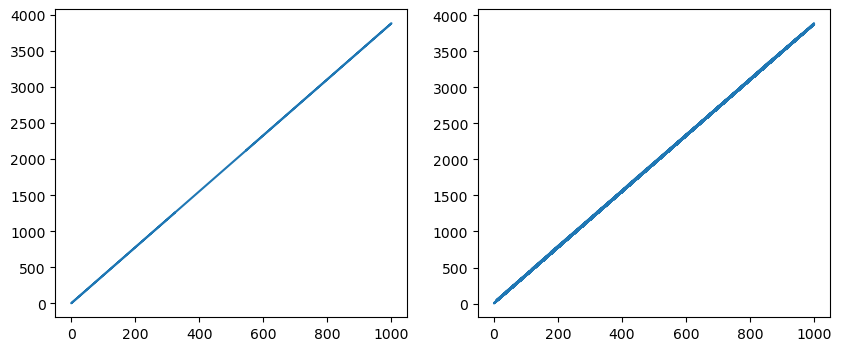

In [111]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(train[0].x, train[0].y)
plt.subplot(1,2,2)
plt.plot(test[0].x, test[0].y)

In [112]:
# fig, axes = plt.subplots(1, 3, figsize=(10, 4))
# for i in range(3):
#     axes[i].plot(train[i].x, train[i].y)

In [113]:
X = train[0].x.values
X.reshape(-1,1).shape

(100000, 1)

In [114]:
reg = [LinearRegression(n_jobs=-1) for _ in range(3)]

for i in range(3):
    reg[i].fit(reshape(train[i].x), reshape(train[i].y))

In [115]:
for i in range(3):
    print(i, reg[i].coef_, reg[i].intercept_)

0 [[3.87690246]] [1.59928255]
1 [[3.8769]] [-6.82121026e-13]
2 [[3.87691727]] [3.96302162]


In [116]:
# error term by y_pred - a * x - b
error = [
        train[i].y - reg[i].coef_[0] * train[i].x - reg[i].intercept_
        for i in range(3)]



In [117]:
for i in range(3):
    mse = mean_squared_error(train[i].y, error[i])
    mae = mean_absolute_error(train[i].y, error[i])
    print(i, mae, mse)

0 1947.3119691099018 5043882.595597386
1 1945.7114496596207 5037650.144272449
2 1949.68313834488 5053132.591569721


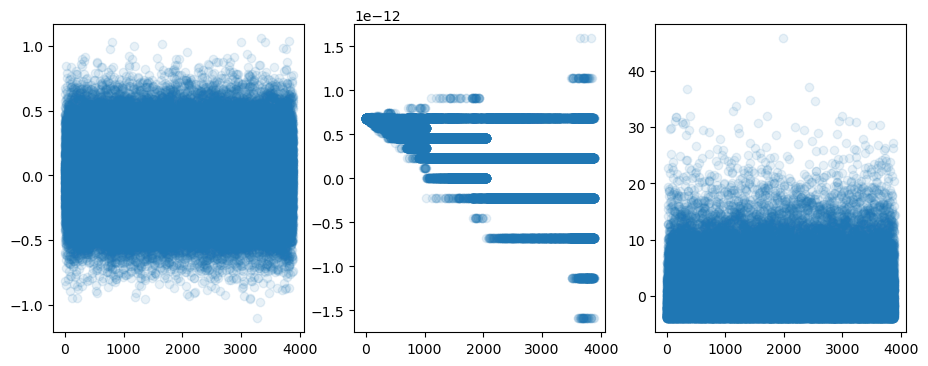

In [118]:
fig, axes = plt.subplots(1,3, figsize=(11,4))

for i in range(3):
    axes[i].scatter(train[i].y, error[i], alpha=0.1)

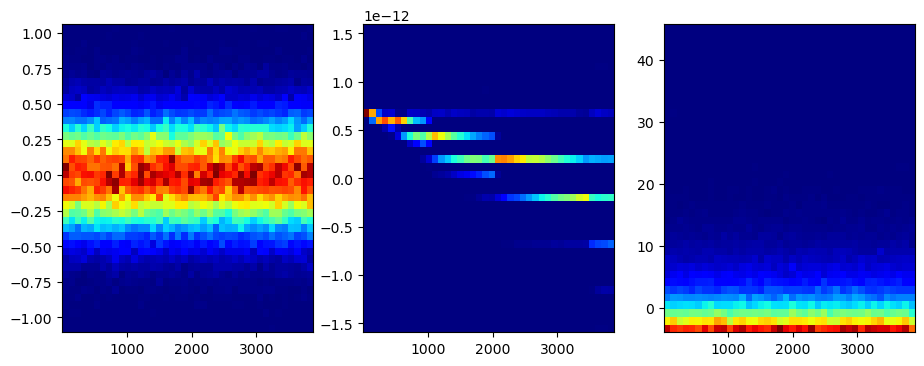

In [122]:
fig, axes = plt.subplots(1,3, figsize=(11,4))

for i in range(3):
    axes[i].hist2d(train[i].y, error[i], (40, 40), cmap='jet')

the error in training set A is likely from guassian distribution